<img src="./Images/quantum.jpg" width="1000" height="1000" class="center">


# Quantum Computing

***

## What is Quantum Computing?


## How does a Quantum Computer work?

## Comparison of classical computers and quantum computers

# Deutsch's Algorithm
***

## Deutschs Algorithm explained


In [1]:
# Qiskit itself and aer simulator
import qiskit
import qiskit.providers.aer as aer

In [2]:
# Diagrams
import matplotlib.pyplot as plt
plt.style.use('ggplot')

## Constant Zero Function

In [3]:
# Create a quantum circuit.
circuit = qiskit.QuantumCircuit(2, 1)

In [4]:
# Initialise the first qubit to |0>.
circuit.initialize([1, 0], 0)

In [5]:
# Initialise the second qubit to |1>.
circuit.initialize([0, 1], 1)

In [6]:
# Apply a Hadamard gate to first qubit.
circuit.h(0)

In [7]:
# Apply a Hadamard gate to second qubit.
circuit.h(1)

In [8]:
# Identity gate.
circuit.i(1)

In [9]:
# Apply another Hadamard gate to the first qubit.
circuit.h(0)

In [10]:
# Measure the first qubit.
circuit.measure(0, 0)

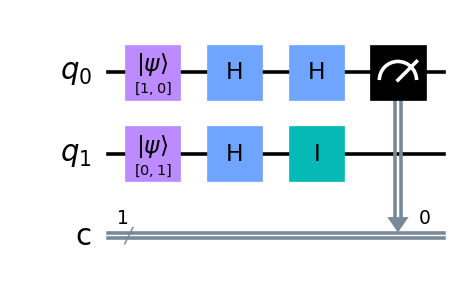

In [11]:
# Draw the circuit.
circuit.draw(output='mpl', scale=1.8)

In [12]:
# Create a simulation instance.
simulator = aer.QasmSimulator()

In [13]:
# Compile the circuit in the simluator.
compcircuit = qiskit.transpile(circuit, simulator)

In [14]:
# Simulate the circuit 1000 times.
job = simulator.run(compcircuit, shots=1000)

In [15]:
# Get the results.
results = job.result()

In [16]:
# Show the result counts.
counts = results.get_counts()
counts

{'0': 1000}

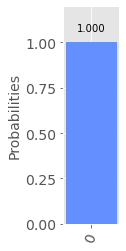

In [17]:
# Display histogram
qiskit.visualization.plot_histogram(counts, figsize=(1, 4))

## Constant One Function
***

In [18]:
# Create a quantum circuit.
circuit = qiskit.QuantumCircuit(2, 1)

In [19]:
# Initialise the first qubit to |0>.
circuit.initialize([1, 0], 0)

In [20]:
# Initialise the second qubit to |1>.
circuit.initialize([0, 1], 1)

In [21]:
# Apply a Hadamard gate to each qubit.
circuit.h((0, 1))

In [22]:
# X gate.
circuit.x(1)

In [23]:
# Apply another Hadamard gate to the first qubit.
circuit.h(0)

In [24]:
# Measure the first qubit.
circuit.measure(0, 0)

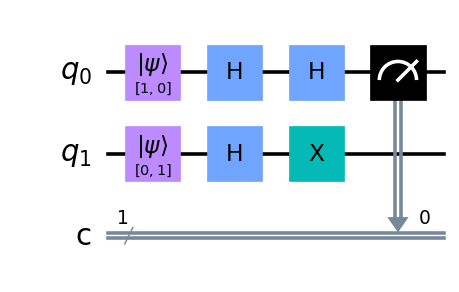

In [25]:
# Draw the circuit.
circuit.draw(output='mpl', scale=1.8)

In [26]:
# Create a simulation instance.
simulator = aer.QasmSimulator()

In [27]:
# Compile the circuit in the simluator.
compcircuit = qiskit.transpile(circuit, simulator)

In [28]:
# Compile the circuit in the simluator.
compcircuit = qiskit.transpile(circuit, simulator)

In [29]:
#Get the results.
results = job.result()

In [30]:
# Show the result counts.
counts = results.get_counts()

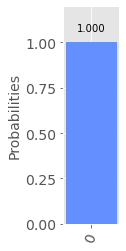

In [31]:
# Display histogram
qiskit.visualization.plot_histogram(counts, figsize=(1, 4))